<a href="https://colab.research.google.com/github/niharika4246/AV/blob/master/All_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.animation as animation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset_tk_Final.csv',index_col='Date',parse_dates=True)

In [ ]:
df.head()


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Total Consumption
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,3373.4
2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,3403.7
2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,3304.1
2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,3308.9


In [ ]:
#using mean
df.fillna(df.mean(), inplace=True)

In [ ]:
print(df[370:390])  

               Punjab     Haryana  ...  Tripura  Total Consumption
Date                               ...                            
2020-01-06  139.52635  137.650108  ...  4.10216         3395.67797
2020-01-07  139.52635  137.650108  ...  4.10216         3395.67797
2020-01-08  139.52635  137.650108  ...  4.10216         3395.67797
2020-01-09  139.52635  137.650108  ...  4.10216         3395.67797
2020-01-10  139.52635  137.650108  ...  4.10216         3395.67797
2020-01-11  139.52635  137.650108  ...  4.10216         3395.67797
2020-01-12  139.52635  137.650108  ...  4.10216         3395.67797
2020-01-13   69.50000   69.100000  ...  3.40000         3023.30000
2020-01-14   78.10000   77.100000  ...  3.50000         3151.50000
2020-01-15   91.10000   92.600000  ...  3.80000         3322.40000
2020-01-16   92.50000  100.700000  ...  4.00000         3363.10000
2020-01-17   96.00000  103.400000  ...  3.90000         3342.20000
2020-01-18   89.20000   95.800000  ...  3.90000         3241.9

In [ ]:
df.tail()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Total Consumption
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-19,120.5,131.6,250.3,71.7,290.9,39.3,30.1,50.2,4.1,74.1,332.6,262.7,464.8,10.0,18.1,184.6,228.9,239.1,75.6,311.0,7.5,77.4,25.2,68.9,119.9,2.0,2.3,22.7,2.7,6.6,1.8,2.4,3.1,3532.7
2020-05-20,123.8,131.6,251.7,70.7,292.0,39.4,30.5,49.7,4.1,75.6,337.0,267.7,463.7,9.8,18.2,189.5,226.2,239.5,75.4,312.9,7.5,77.0,25.1,71.0,120.7,2.0,2.3,22.8,2.7,6.9,1.6,2.3,3.6,3554.5
2020-05-21,126.0,133.0,249.7,73.4,295.5,40.1,31.1,51.1,4.2,71.8,337.3,267.7,452.7,9.6,17.9,188.1,226.7,238.3,75.4,314.7,7.5,79.6,25.7,72.0,121.4,2.1,2.2,23.9,2.3,6.7,1.6,2.1,3.7,3555.1
2020-05-22,127.2,131.6,247.4,62.0,295.4,39.2,30.3,50.7,3.9,72.8,333.9,266.9,449.6,9.6,18.0,187.4,220.6,230.7,73.4,314.6,7.6,76.4,25.4,77.0,120.2,1.9,2.0,23.0,2.4,6.7,1.7,2.2,3.4,3515.1
2020-05-23,121.6,122.9,243.3,72.1,286.3,35.6,27.5,49.9,3.5,69.3,318.9,261.6,428.1,8.3,17.7,180.5,192.9,214.3,67.0,295.9,6.9,75.9,25.4,84.3,111.2,1.0,2.7,20.9,2.1,6.4,1.6,2.2,3.4,3361.2


In [ ]:
df1=df['Total Consumption']

In [ ]:
df1


Date
2019-01-01    3395.67797
2019-01-02    3373.40000
2019-01-03    3403.70000
2019-01-04    3304.10000
2019-01-05    3308.90000
                 ...    
2020-05-19    3532.70000
2020-05-20    3554.50000
2020-05-21    3555.10000
2020-05-22    3515.10000
2020-05-23    3361.20000
Name: Total Consumption, Length: 509, dtype: float64

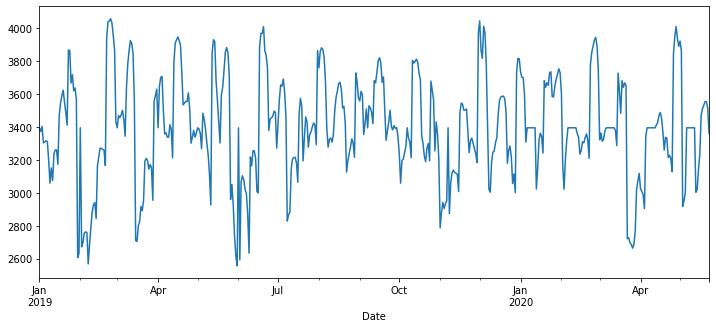

In [ ]:
df1.plot(figsize=(12,5))

In [ ]:
np.random.seed(7)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(509, 1)

In [ ]:
#splitting dataset into train and test
training_size=int(len(df1)*0.65)       #0.65
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(330, 179)

In [ ]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 100     #100 time_step
X_train, y_train = create_dataset(train_data, look_back)
X_test, ytest = create_dataset(test_data, look_back)

In [ ]:
print(X_train.shape), print(y_train.shape)

(229, 100)
(229,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(78, 100)
(78,)


(None, None)

In [ ]:
#reshape input to be [samples, time steps, features]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
# create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
#define model
model= Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(100,1),activation='relu',dropout=0.25))  #100,1  and LSTM(50)
model.add(LSTM(64,return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
#model.compile(optimizer='adam',loss='mean_squared_error')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])  #mse


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 50)                23000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 72,971
Trainable params: 72,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1) #batch size=64  ##400 epochs


Epoch 1/100
8/8 [==============================] - 6s 257ms/step - loss: 0.2383 - mse: 0.2383 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 2/100
8/8 [==============================] - 1s 154ms/step - loss: 0.0980 - mse: 0.0980 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 3/100
8/8 [==============================] - 1s 149ms/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 4/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 5/100
8/8 [==============================] - 1s 151ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 6/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 7/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 8/100
8/8 [==============================] - 1s 151ms/step - loss: 0.0382 - m

In [ ]:
# the prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

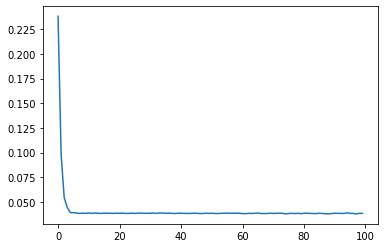

In [ ]:
plt.plot(history.history['loss'])
plt.show()

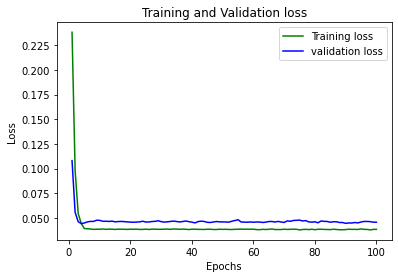

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#loss_train = history.history['acc']
#loss_val = history.history['val_acc']
#epochs = range(1,101)
#plt.plot(epochs, loss_train, 'g', label='Training accuracy')
#plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#plt.title('Training and Validation accuracy')
#plt.xlabel('epochs')
#plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
# train data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3403.1265630025327

In [ ]:
# train data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3397.140889535924

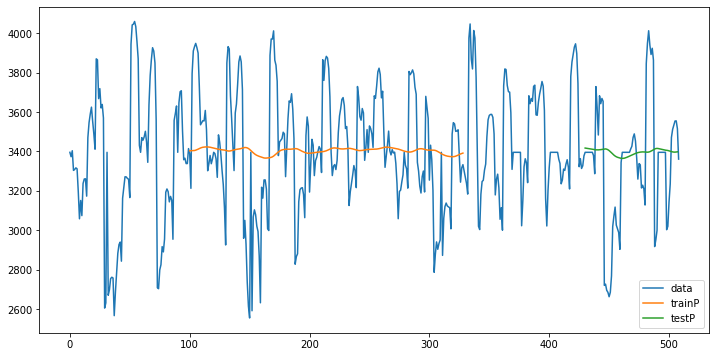

In [ ]:
# plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]= train_predict
#shift test prediction for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]= numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
#plot baseline and predictions
plt.xlabel=('Date')
plt.ylabel=('Consumption')
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data','trainP', 'testP'])
plt.show()

In [ ]:
len(test_data)

179

In [ ]:
x_input=test_data[79:].reshape(1,-1)   #77
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
#demonstrate predictions for next 100 days
from numpy import array
lst_output=[]
n_steps=100    #100
i=0
while(i<30):       #30 for 30 days

    if(len(temp_input)>100):
      #print(temp_input)
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input=x_input.reshape((1,n_steps,1))
      #print(x_input)
      yhat=model.predict(x_input,verbose=0)
      print("{} day output {}".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      #print(temp_input)
      lst_output.extend(yhat.tolist())
      i=i+1
    else:
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

print(lst_output)


[0.5620295]
101
1 day input [0.45247123 0.46570877 0.50209539 0.49770505 0.51885851 0.53375906
 0.50881394 0.43517595 0.81447482 0.86343378 0.88950975 0.91372314
 0.92463248 0.89203752 0.79119271 0.51014435 0.53741768 0.50422404
 0.5132708  0.54666401 0.55868953 0.55868953 0.55868953 0.55868953
 0.55868953 0.55868953 0.55868953 0.54779485 0.48646311 0.78028338
 0.70943923 0.61704251 0.74935143 0.72267678 0.74037118 0.73072574
 0.10995809 0.11408235 0.09326149 0.08660946 0.07164239 0.08654294
 0.14182133 0.30825517 0.34364398 0.37397725 0.31304464 0.30107098
 0.28816603 0.23149072 0.52464578 0.55868953 0.55868953 0.55868953
 0.55868953 0.55868953 0.55868953 0.55868953 0.5698796  0.5790594
 0.60866095 0.62083416 0.59688685 0.54027805 0.46836959 0.52065456
 0.51659682 0.43843544 0.44774829 0.43510943 0.38089536 0.85777955
 0.92656156 0.96873545 0.92057474 0.88864498 0.90959888 0.86962017
 0.24073705 0.2638196  0.29548327 0.55868953 0.55868953 0.55868953
 0.55868953 0.55868953 0.55868953 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)    #101,131

In [ ]:
import matplotlib.pyplot as plt
len(df1)

509

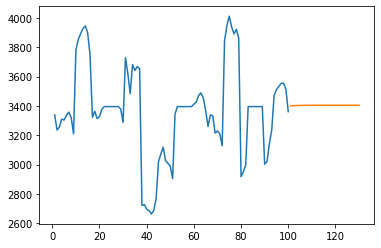

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[409:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

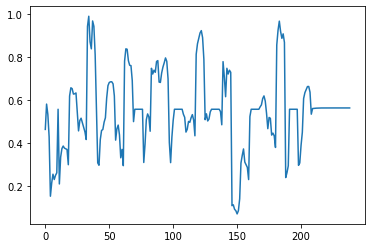

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[300:])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('R2 Score: ', r2_score(ytest,test_predict))
print('MAE: ', mean_absolute_error(ytest,test_predict))
#print('R2 Score: ', r2_score(day_new,day_pred))
#print('MAE: ', mean_absolute_error(day_new,day_pred))

R2 Score:  -263342977.49737772
MAE:  3397.1071060982567


In [ ]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))*100

In [ ]:
mape(X_test,ytest)
#mape(X_test,ytest)
#mape(day_new,day_pred)

58.67563898801881

# ***SVM***

In [ ]:
X_test.shape

(78, 100, 1)

In [ ]:
X_test=X_test.reshape(78,100*1)

In [ ]:
ytest=np.round(ytest).astype(int)

In [ ]:
ytest

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True,kernel='linear')
sv_clf.fit(X_test,ytest)
sv_clf.score(X_test,ytest)

0.9743589743589743

In [ ]:
y_pred = sv_clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.9743589743589743


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.96      1.00      0.98        51

    accuracy                           0.97        78
   macro avg       0.98      0.96      0.97        78
weighted avg       0.98      0.97      0.97        78



ValueError: ignored


# **DECISION TREE**

In [ ]:
X_train.shape

(229, 100, 1)

In [ ]:
X_train= X_train.reshape(229,100*1)

In [ ]:
y_train=np.round(y_train).astype(int)

In [ ]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,ytest)

y_pred=dt_clf.predict(X_test)
dt_clf.score(X_test,ytest)

0.7435897435897436

# ***Build random forest classifier***

In [ ]:
from sklearn import ensemble
rf_clf=ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,ytest)

0.6410256410256411

# ***GRADIENT BOOSTING CLASSIFIER***

In [ ]:
gb_clf=ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test,ytest)

0.717948717948718